**Prepring the Tools**

We are going to use pandas , Matplotlib and Numpy for Data analysis and manupulation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# MOdeles from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import precision_score , recall_score , f1_score
from sklearn.metrics import plot_roc_curve

**Load Data**


In [2]:
df = pd.read_csv("heart-disease.csv")
df;

## Data exploration (exploratory data analysis or EDA)
Here we will explore and visulize data using graph and find the most related features in the Dataset


In [3]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

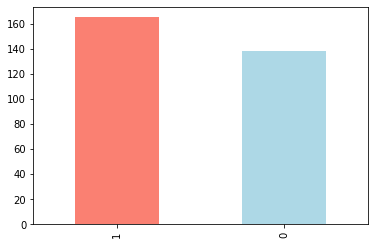

In [4]:
df["target"].value_counts().plot(kind = "bar" , color = ["salmon" , "lightblue"]);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#Tels us about the data 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Diesase Frequency according to sex


In [8]:
df["sex"].value_counts() 

1    207
0     96
Name: sex, dtype: int64

In [9]:
# Camparing target and sex column
pd.crosstab(df.target , df.sex) 

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

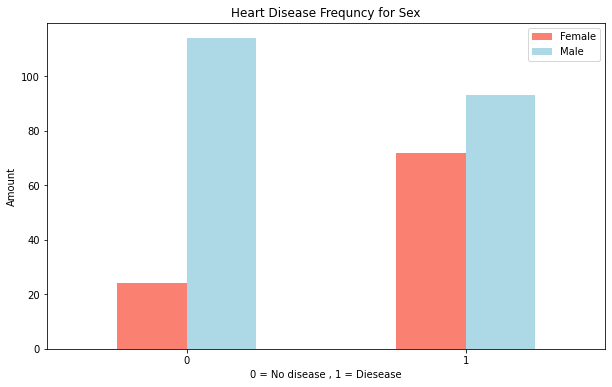

In [10]:
pd.crosstab(df.target , df.sex).plot(kind = "bar" , 
                                    figsize = (10 , 6),
                                    color = ["salmon" , "lightblue"]);
plt.title("Heart Disease Frequncy for Sex")
plt.xlabel("0 = No disease , 1 = Diesease")
plt.ylabel("Amount")
plt.legend(["Female" , "Male"])
plt.xticks(rotation = 0)

## Heart Disease per chest pain type
cp = Chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophegeal spasms(non heart related)

3: Asymptomatic: chest pain not showing signs of disease

In [11]:
pd.crosstab(df.cp , df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


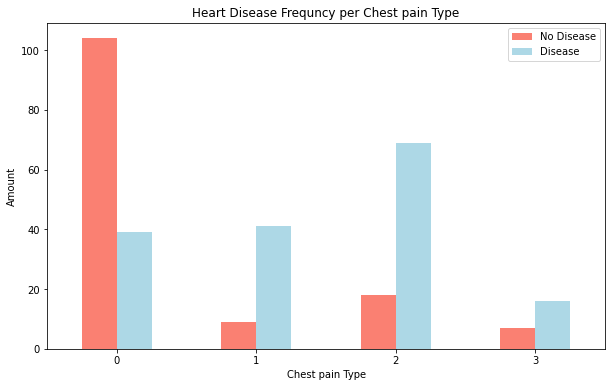

In [12]:
# Make the crosstab more visual
pd.crosstab(df.cp , df.target).plot(kind = "bar" , 
                                   figsize = (10 , 6),
                                   color = ["salmon" , "lightblue"])
plt.title("Heart Disease Frequncy per Chest pain Type")
plt.xlabel("Chest pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease" , "Disease"])
plt.xticks(rotation = 0);

In [13]:
# MAke a corealtion MAtrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

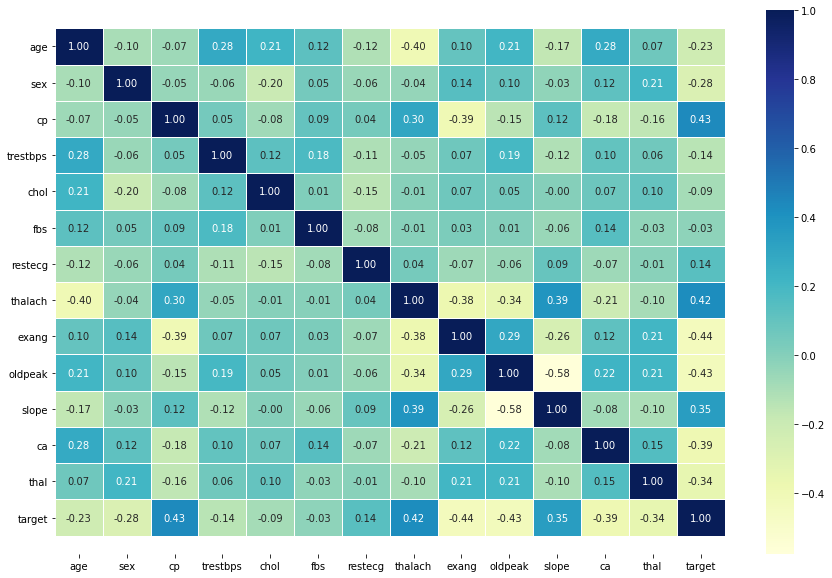

In [15]:
# Lets make a corealtion matrix more visual
corr_matrix = df.corr()
fig , ax = plt.subplots(figsize = (15 , 10))
ax = sns.heatmap(corr_matrix ,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
bottom , top = ax.get_ylim()
ax.set_ylim(bottom + 0.5 , top - 0.5)

# 5.Modelling

In [16]:
#Spliting  into x and y
x = df.drop("target" , axis = 1)
y = df["target"]

In [17]:
##Spliting into test and train set 
np.random.seed(42)
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2 , random_state = 0)

## The three ways of training model which are we going to use
1. Logistic Regression
2. K-Nearest neighbours classifier
3. Random Forest Classifier

In [18]:
##Putting the model into a dictionary
models = {"Logistic Regression" : LogisticRegression(),
        "KNN" : KNeighborsClassifier(),
        "Random Forest Classifier" : RandomForestClassifier()}
def check(models , x_train , x_test , y_train , y_test):
    """
    This function fits all the model type assigned above then loop through them and tells the best model to use
    x_train = training data (no labels)
    x_test = testing data (no labels)
    y_train = training labels
    y_test = test labels
    """
    np.random.seed(42)
    # Creating the dictionary to save the model score
    model_score = {}
    for name , model in models.items():
        # Appling the model to data
        model.fit(x_train , y_train)
        #Evaluting and appending it to the model
        model_score[name] = model.score(x_test , y_test)
    return model_score

In [19]:
# Now checking the model
model_score = check(models , x_train , x_test , y_train , y_test)
model_score

c:\users\sharm\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest Classifier': 0.8524590163934426}

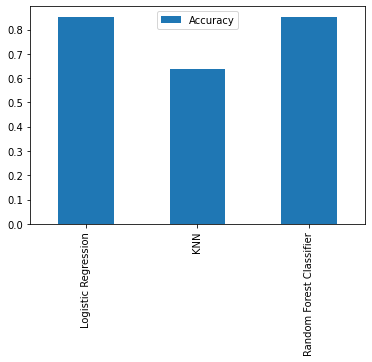

In [20]:
## Camparing the model
model_camp = pd.DataFrame(model_score , index = ["Accuracy"])
model_camp.T.plot.bar();

# Hyperparameter tunning using RandomizedSearchCV
* Logistic Regression()
* RandomForestClassifier()

In [21]:
## Creating a Hyperprameter tunner
log_reg_grid = {"C" : np.logspace(-4 , 4 , 20) ,
               "solver" : ["liblinear"]}
# Create a  hyperprameter grid for RandomForestClassifier
rf_grid = {"n_estimators" : np.arange(10 , 1000 , 50) ,
            "max_depth" : [  3 , 5 ],
          "min_samples_split" : np.arange(2 , 20 ,2),
          "min_samples_leaf" : np.arange(1,20,2)} 

Tunning Logistic Regression

In [22]:
# Tune LogisticRegression
np.random.seed(42)
# Setup random Hyperprameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)
# Fit random Hyperprameter search model
rs_log_reg.fit(x_train , y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [23]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [24]:
rs_log_reg.score(x_test,y_test) 

0.8524590163934426

Tunning RandomForest

In [25]:
#Tune the RandomForestClassifier
np.random.seed(42)
# Tunning to Randomized Search
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
# Fitting the model
rs_rf.fit(x_train  , y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [3, 5],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [26]:
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 5}

In [27]:
rs_rf.score(x_test , y_test)

0.8524590163934426

In [28]:
model_score

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest Classifier': 0.8524590163934426}

# Tunnig with Grid Search
Since Logistic is the best then we will go with Grid Search CV to improve our Logistic Regresion model

In [29]:
# Diffrent hyperprameter for our LogisticREgrssion model
log_reg_grid = {"C" : np.logspace(-4 , 4 , 30) ,
               "solver" : ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)
#Fit the model
gs_log_reg.fit(x_train , y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [30]:
#Checing the best parameter 
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [31]:
gs_log_reg.score(x_test , y_test)

0.8524590163934426

# Evaluation 

In [32]:
y_preds = gs_log_reg.predict(x_test)

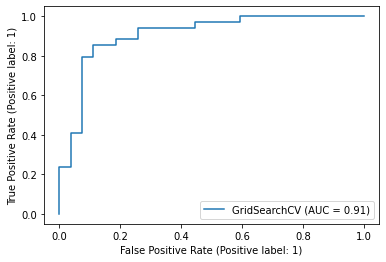

In [33]:
# ploting the ROC Curve and calculating the AUC 
plot_roc_curve(gs_log_reg , x_test , y_test);

In [34]:
# Creating the Canfusion Matrix
print(confusion_matrix(y_test , y_preds))

[[22  5]
 [ 4 30]]


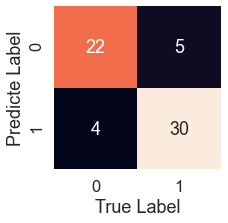

In [35]:
##Ploting the confusion matrix on seaborn
sns.set(font_scale=1.5)
def abc(y_test , y_preds):
    """
    Plotting the prediction on confusion matrix using the Seaborn
    """
    fig , ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test , y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicte Label")
abc(y_test , y_preds)

In [36]:
# Classification Report
print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



# Creating the classification report using cross-validation
we are going to calculate the Precision , f1 , recall and accuracy using 'cross_val_score()'

In [37]:
## Checkig the best parameter
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [38]:
clf = LogisticRegression(C = 1.3738237958832638 , solver = "liblinear")  

In [39]:
# Calculating the accuracy
clf_acc = cross_val_score(clf , x , y , cv = 5 , scoring = "accuracy")
clf_acc = np.mean(clf_acc)
clf_acc

0.8215300546448088

In [40]:
## Calculating the precision
clf_pre = cross_val_score(clf , x , y , cv = 5 , scoring="precision")
clf_pre = np.mean(clf_pre)
clf_pre

0.817900063251107

In [41]:
clf_recall = cross_val_score(clf , x , y , cv = 5 , scoring="recall")
clf_recall = np.mean(clf_recall)
clf_recall

0.8727272727272727

In [42]:
clf_f1 = cross_val_score(clf , x , y , cv = 5 , scoring="f1")
clf_f1 = np.mean(clf_f1)
clf_f1

0.8431741323998502

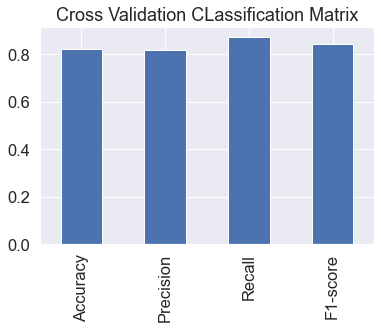

In [43]:
# Visualize the data in form of graph
cv_metrics = pd.DataFrame({"Accuracy" : clf_acc,
                          "Precision" : clf_pre,
                          "Recall" : clf_recall,
                          "F1-score" : clf_f1},
                         index = [0])
cv_metrics.T.plot.bar(title = "Cross Validation CLassification Matrix" ,
                      legend = False );